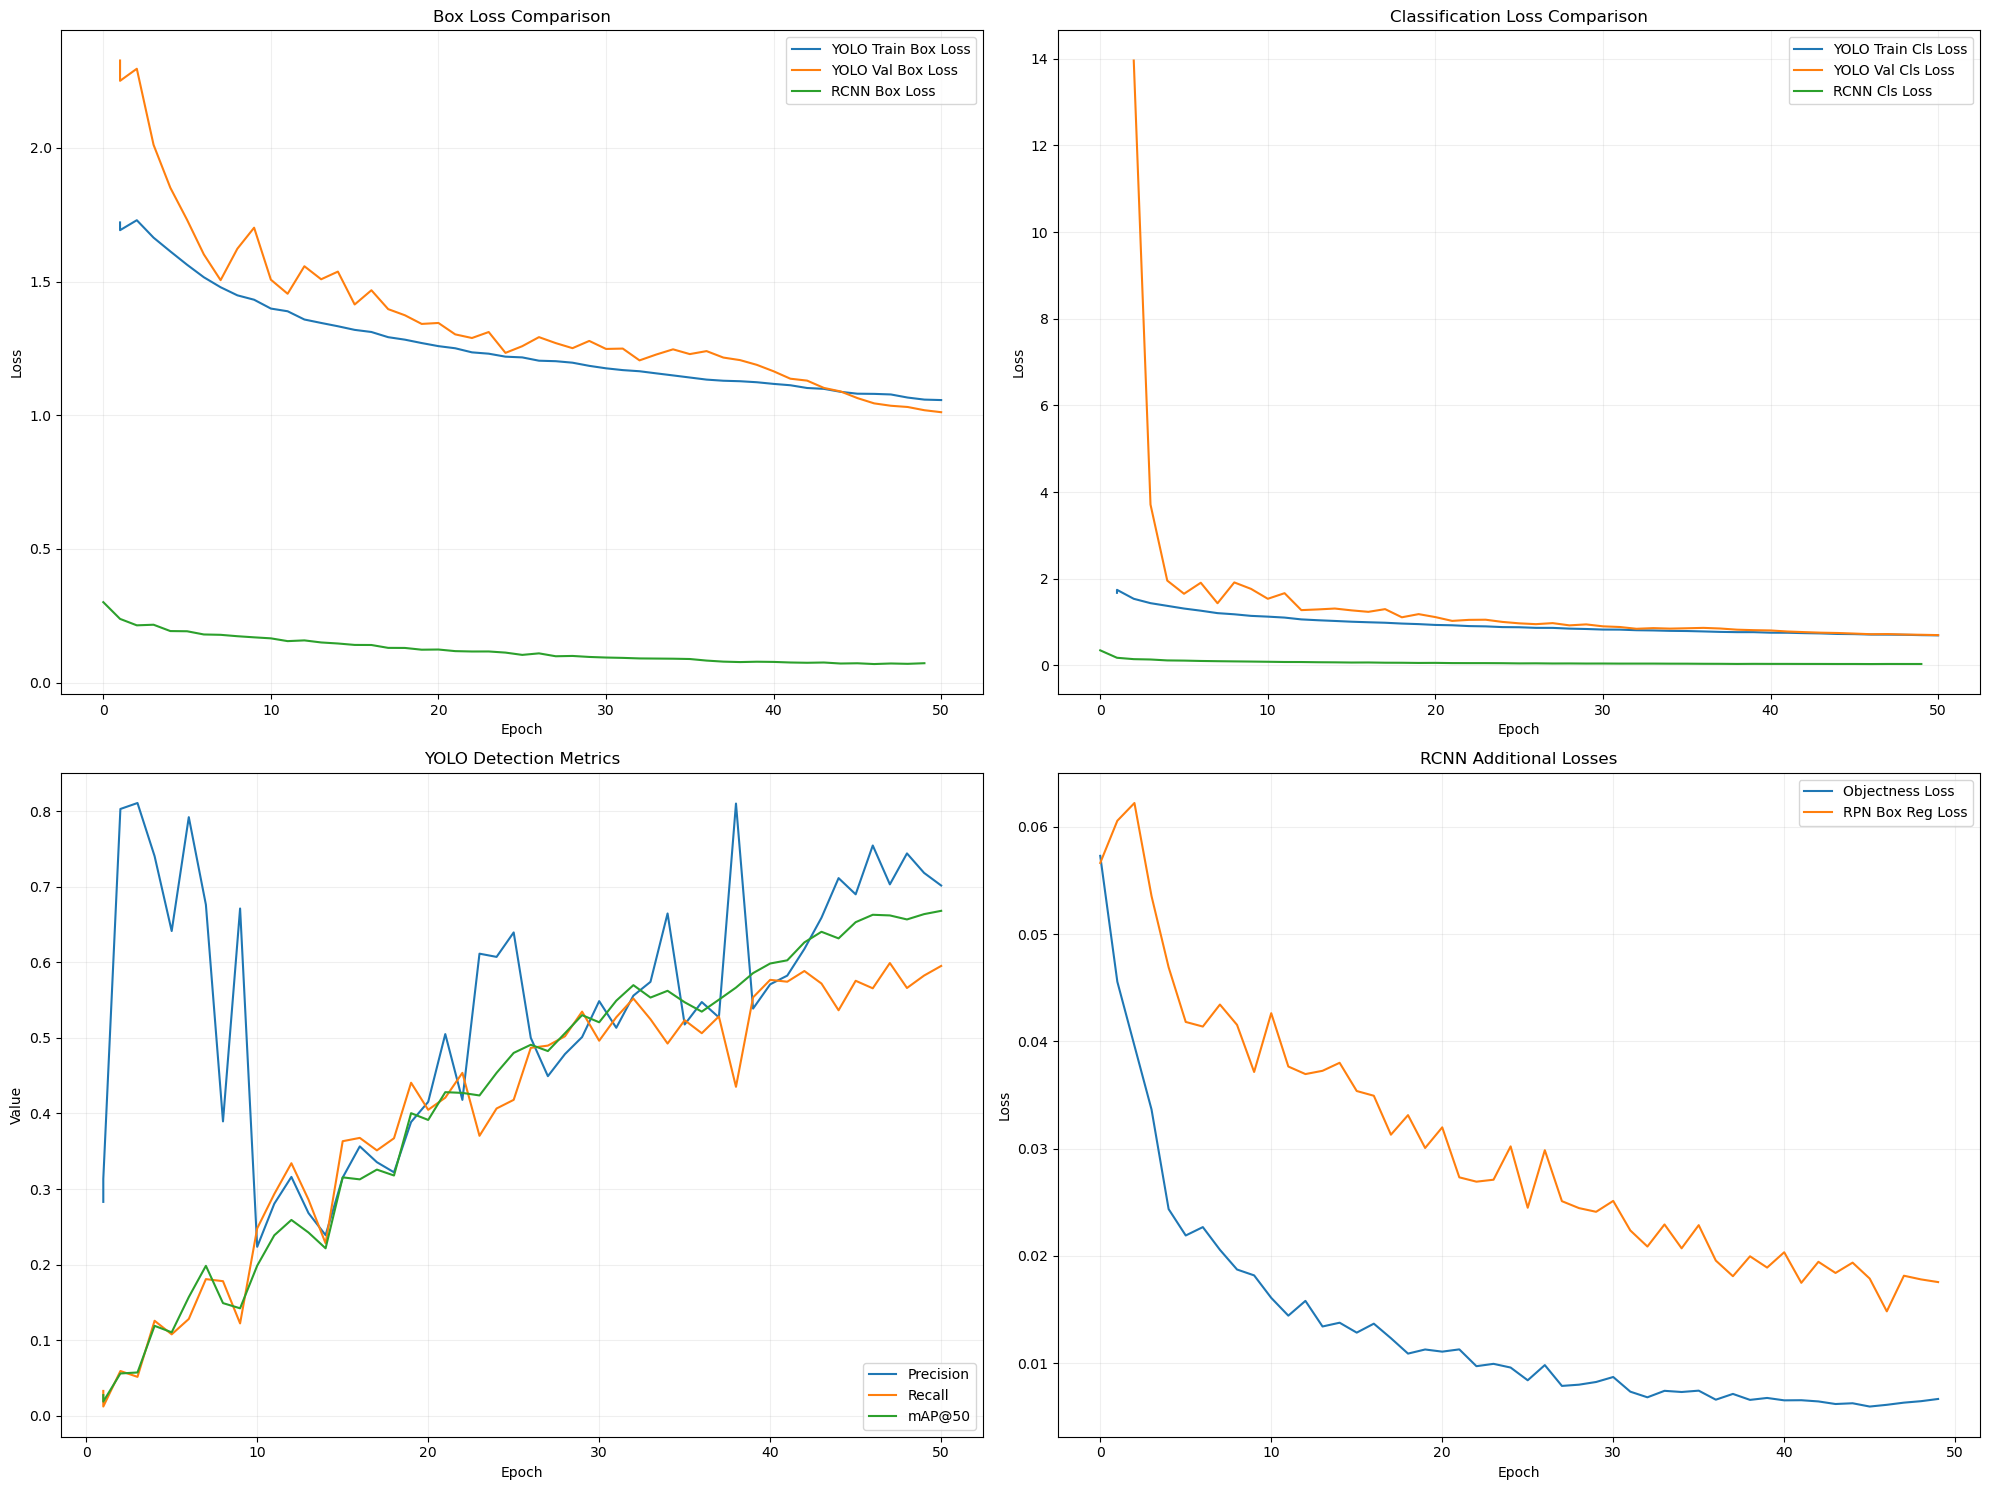


Final Metrics:

YOLO Final Values:
mAP@50: 0.6682
mAP@50-95: 0.4379
Precision: 0.7017
Recall: 0.5953

RCNN Final Values:
Box Loss: 0.0724
Classifier Loss: 0.0304
Objectness Loss: 0.0067
RPN Box Reg Loss: 0.0176


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_comparison(yolo_data, rcnn_data):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
    
    # Plot 1: Box Losses
    ax1.plot(yolo_data['epoch'], yolo_data['train/box_loss'], label='YOLO Train Box Loss')
    ax1.plot(yolo_data['epoch'], yolo_data['val/box_loss'], label='YOLO Val Box Loss')
    ax1.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_box_reg'].mean(), label='RCNN Box Loss')
    ax1.set_title('Box Loss Comparison')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.2)

    # Plot 2: Classification Losses
    ax2.plot(yolo_data['epoch'], yolo_data['train/cls_loss'], label='YOLO Train Cls Loss')
    ax2.plot(yolo_data['epoch'], yolo_data['val/cls_loss'], label='YOLO Val Cls Loss')
    ax2.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_classifier'].mean(), label='RCNN Cls Loss')
    ax2.set_title('Classification Loss Comparison')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.2)

    # Plot 3: Object Detection Metrics (YOLO)
    ax3.plot(yolo_data['epoch'], yolo_data['metrics/precision(B)'], label='Precision')
    ax3.plot(yolo_data['epoch'], yolo_data['metrics/recall(B)'], label='Recall')
    ax3.plot(yolo_data['epoch'], yolo_data['metrics/mAP50(B)'], label='mAP@50')
    ax3.set_title('YOLO Detection Metrics')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Value')
    ax3.legend()
    ax3.grid(True, alpha=0.2)

    # Plot 4: RCNN Additional Losses
    ax4.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_objectness'].mean(), label='Objectness Loss')
    ax4.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_rpn_box_reg'].mean(), label='RPN Box Reg Loss')
    ax4.set_title('RCNN Additional Losses')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    print("\nFinal Metrics:")
    print("\nYOLO Final Values:")
    final_yolo = yolo_data.iloc[-1]
    print(f"mAP@50: {final_yolo['metrics/mAP50(B)']:.4f}")
    print(f"mAP@50-95: {final_yolo['metrics/mAP50-95(B)']:.4f}")
    print(f"Precision: {final_yolo['metrics/precision(B)']:.4f}")
    print(f"Recall: {final_yolo['metrics/recall(B)']:.4f}")
    
    print("\nRCNN Final Values:")
    final_rcnn = rcnn_data.groupby('epoch').mean().iloc[-1]
    print(f"Box Loss: {final_rcnn['loss_box_reg']:.4f}")
    print(f"Classifier Loss: {final_rcnn['loss_classifier']:.4f}")
    print(f"Objectness Loss: {final_rcnn['loss_objectness']:.4f}")
    print(f"RPN Box Reg Loss: {final_rcnn['loss_rpn_box_reg']:.4f}")

# Load and prepare data
yolo_data = pd.read_csv('/Users/ujjwalbhatta/CV-YOLO/training/yolov5n/results.csv')
rcnn_data = pd.read_csv('/Users/ujjwalbhatta/Downloads/ComputerVision-RCNN/training_metrics/training_metrics_20241129_185606.csv')

# Create visualizations
plot_model_comparison(yolo_data, rcnn_data)

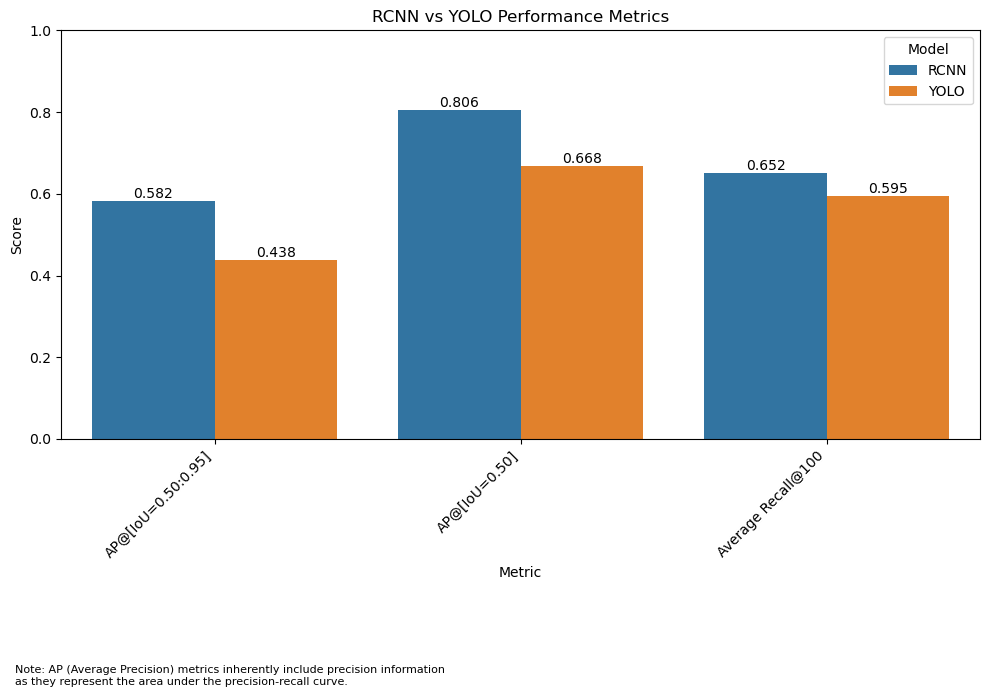

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_comparison():
    metrics_data = {
        'Metric': [
            'AP@[IoU=0.50:0.95]',
            'AP@[IoU=0.50]',
            'Average Recall@100'
        ],
        'RCNN': [0.582, 0.806, 0.652],
        'YOLO': [0.438, 0.668, 0.595]
    }
    
    df = pd.DataFrame(metrics_data)
    df_melted = pd.melt(df, id_vars=['Metric'], var_name='Model', value_name='Score')
    
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)
    
    # Add value labels on bars
    for i in bar_plot.containers:
        bar_plot.bar_label(i, fmt='%.3f')
    
    plt.title('RCNN vs YOLO Performance Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    
    # Add text box with interpretation
    plt.figtext(0.02, -0.15, 
                "Note: AP (Average Precision) metrics inherently include precision information\n" +
                "as they represent the area under the precision-recall curve.",
                fontsize=8, ha='left')
    
    plt.savefig('final_comparison.png', dpi=300, bbox_inches='tight')

create_comparison()


Final Box Losses:
YOLO Train Box Loss: 1.0569
YOLO Val Box Loss: 1.0114
RCNN Box Loss: 0.0724


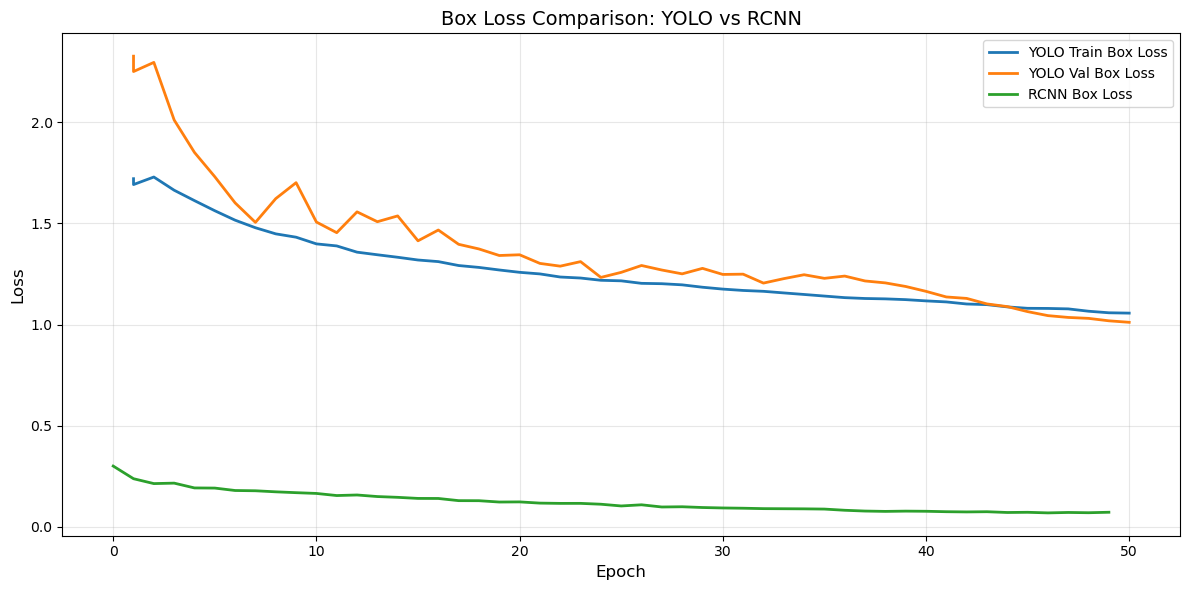

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_losses(yolo_data, rcnn_data):
    plt.figure(figsize=(12, 6))
    
    # Plot box losses
    plt.plot(yolo_data['epoch'], yolo_data['train/box_loss'], label='YOLO Train Box Loss', linewidth=2)
    plt.plot(yolo_data['epoch'], yolo_data['val/box_loss'], label='YOLO Val Box Loss', linewidth=2)
    plt.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_box_reg'].mean(), 
             label='RCNN Box Loss', linewidth=2)
    
    plt.title('Box Loss Comparison: YOLO vs RCNN', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Print final values
    print("\nFinal Box Losses:")
    print(f"YOLO Train Box Loss: {yolo_data['train/box_loss'].iloc[-1]:.4f}")
    print(f"YOLO Val Box Loss: {yolo_data['val/box_loss'].iloc[-1]:.4f}")
    print(f"RCNN Box Loss: {rcnn_data.groupby('epoch')['loss_box_reg'].mean().iloc[-1]:.4f}")
    
    plt.tight_layout()
    plt.show()

# Load data
yolo_data = pd.read_csv('/Users/ujjwalbhatta/CV-YOLO/training/yolov5n/results.csv')
rcnn_data = pd.read_csv('/Users/ujjwalbhatta/Downloads/ComputerVision-RCNN/training_metrics/training_metrics_20241129_185606.csv')

# Create visualization
plot_box_losses(yolo_data, rcnn_data)


Final Classification Losses:
YOLO Train Cls Loss: 0.6913
YOLO Val Cls Loss: 0.6972
RCNN Cls Loss: 0.0304


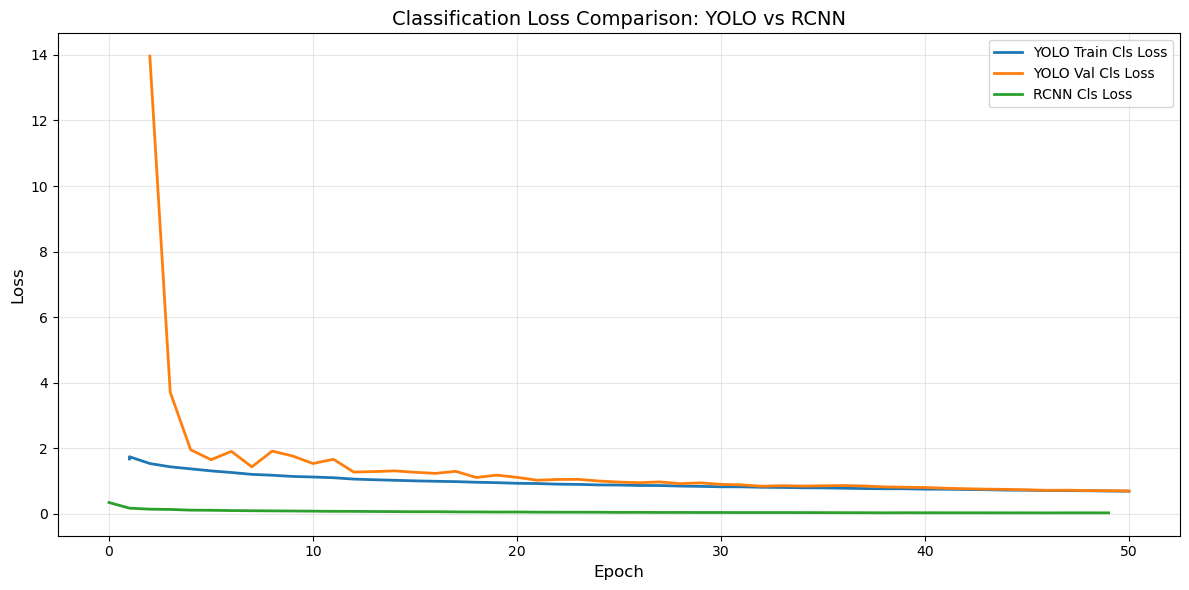

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_classification_losses(yolo_data, rcnn_data):
    plt.figure(figsize=(12, 6))
    
    # Plot classification losses
    plt.plot(yolo_data['epoch'], yolo_data['train/cls_loss'], label='YOLO Train Cls Loss', linewidth=2)
    plt.plot(yolo_data['epoch'], yolo_data['val/cls_loss'], label='YOLO Val Cls Loss', linewidth=2)
    plt.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_classifier'].mean(), 
             label='RCNN Cls Loss', linewidth=2)
    
    plt.title('Classification Loss Comparison: YOLO vs RCNN', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Print final values
    print("\nFinal Classification Losses:")
    print(f"YOLO Train Cls Loss: {yolo_data['train/cls_loss'].iloc[-1]:.4f}")
    print(f"YOLO Val Cls Loss: {yolo_data['val/cls_loss'].iloc[-1]:.4f}")
    print(f"RCNN Cls Loss: {rcnn_data.groupby('epoch')['loss_classifier'].mean().iloc[-1]:.4f}")
    
    plt.tight_layout()
    plt.show()

# Load data
yolo_data = pd.read_csv('/Users/ujjwalbhatta/CV-YOLO/training/yolov5n/results.csv')
rcnn_data = pd.read_csv('/Users/ujjwalbhatta/Downloads/ComputerVision-RCNN/training_metrics/training_metrics_20241129_185606.csv')

# Create visualization
plot_classification_losses(yolo_data, rcnn_data)


Final YOLO Metrics:
Precision: 0.7017
Recall: 0.5953
mAP@50: 0.6682
mAP@50-95: 0.4379


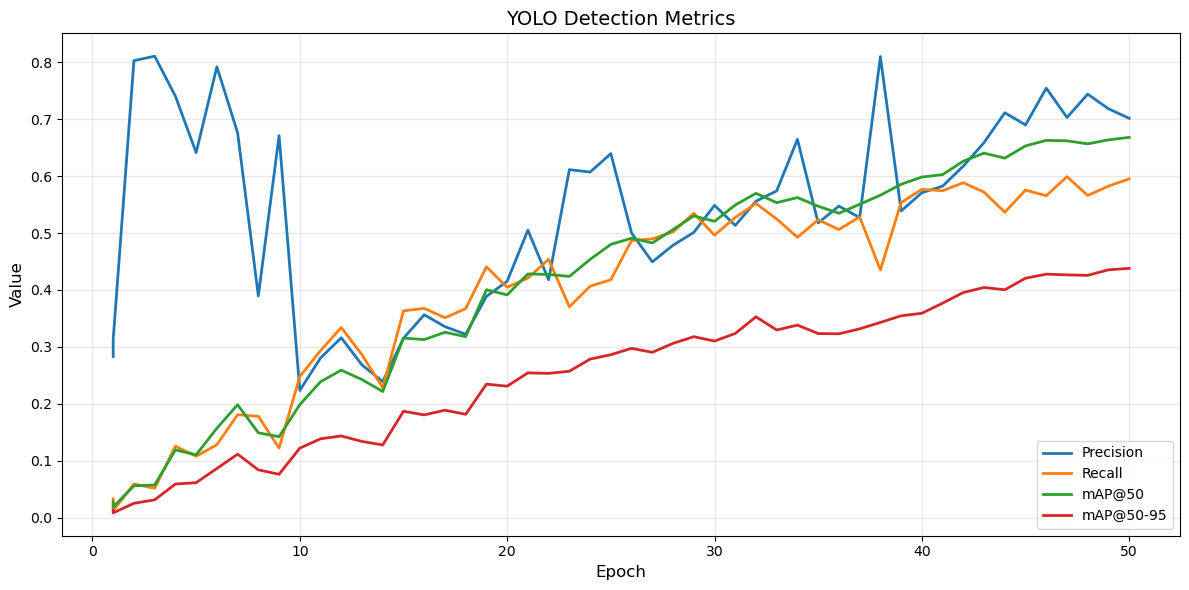

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_yolo_metrics(yolo_data):
    plt.figure(figsize=(12, 6))
    
    # Plot YOLO metrics
    plt.plot(yolo_data['epoch'], yolo_data['metrics/precision(B)'], label='Precision', linewidth=2)
    plt.plot(yolo_data['epoch'], yolo_data['metrics/recall(B)'], label='Recall', linewidth=2)
    plt.plot(yolo_data['epoch'], yolo_data['metrics/mAP50(B)'], label='mAP@50', linewidth=2)
    plt.plot(yolo_data['epoch'], yolo_data['metrics/mAP50-95(B)'], label='mAP@50-95', linewidth=2)
    
    plt.title('YOLO Detection Metrics', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Print final values
    print("\nFinal YOLO Metrics:")
    print(f"Precision: {yolo_data['metrics/precision(B)'].iloc[-1]:.4f}")
    print(f"Recall: {yolo_data['metrics/recall(B)'].iloc[-1]:.4f}")
    print(f"mAP@50: {yolo_data['metrics/mAP50(B)'].iloc[-1]:.4f}")
    print(f"mAP@50-95: {yolo_data['metrics/mAP50-95(B)'].iloc[-1]:.4f}")
    
    plt.tight_layout()
    plt.show()

# Load data
yolo_data = pd.read_csv('/Users/ujjwalbhatta/CV-YOLO/training/yolov5n/results.csv')

# Create visualization
plot_yolo_metrics(yolo_data)


Final RCNN Losses:
Objectness Loss: 0.0067
RPN Box Reg Loss: 0.0176


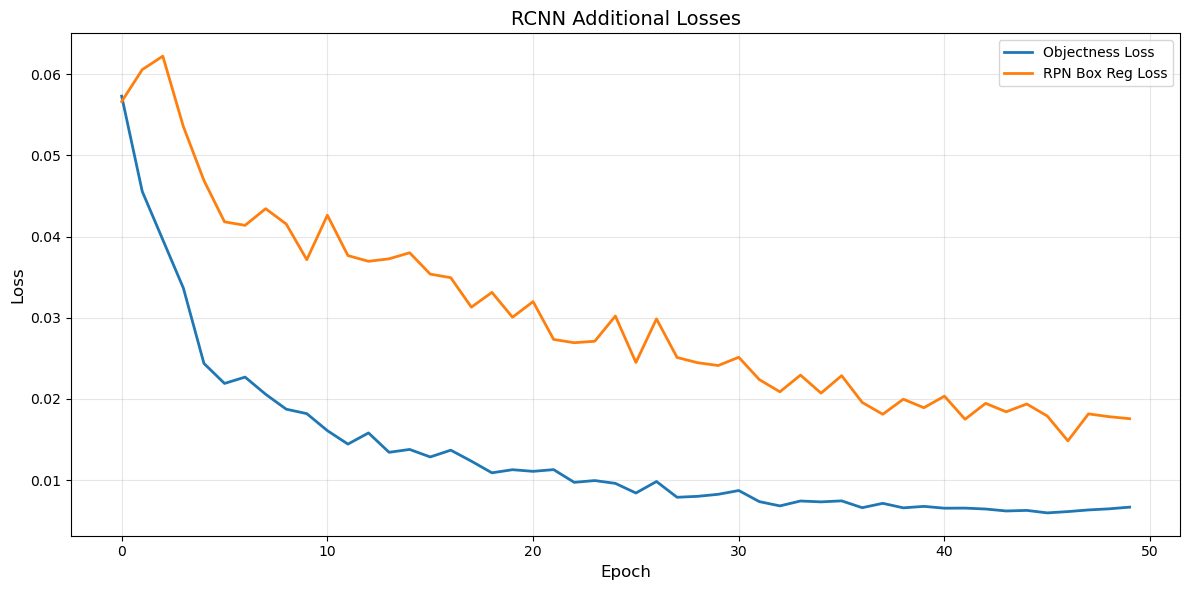

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rcnn_losses(rcnn_data):
    plt.figure(figsize=(12, 6))
    
    # Plot RCNN specific losses
    plt.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_objectness'].mean(), 
             label='Objectness Loss', linewidth=2)
    plt.plot(rcnn_data['epoch'].unique(), rcnn_data.groupby('epoch')['loss_rpn_box_reg'].mean(), 
             label='RPN Box Reg Loss', linewidth=2)
    
    plt.title('RCNN Additional Losses', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Print final values
    print("\nFinal RCNN Losses:")
    final_values = rcnn_data.groupby('epoch').mean().iloc[-1]
    print(f"Objectness Loss: {final_values['loss_objectness']:.4f}")
    print(f"RPN Box Reg Loss: {final_values['loss_rpn_box_reg']:.4f}")
    
    plt.tight_layout()
    plt.show()

# Load data
rcnn_data = pd.read_csv('/Users/ujjwalbhatta/Downloads/ComputerVision-RCNN/training_metrics/training_metrics_20241129_185606.csv')

# Create visualization
plot_rcnn_losses(rcnn_data)